In [7]:
import tensorflow as tf
import tensorflow.keras as keras
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras import models, layers, optimizers, losses

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
train_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/train'
validation_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/validation'

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 49/100 [=============>................] - ETA: 43s - loss: 0.6915 - acc: 0.5134

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.6918 - acc: 0.5133

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 69s 694ms/step - loss: 0.6918 - acc: 0.5134 - val_loss: 0.6859 - val_acc: 0.5444
Epoch 2/100
100/100 [==============================] - 38s 376ms/step - loss: 0.6798 - acc: 0.5706 - val_loss: 0.6694 - val_acc: 0.5755
Epoch 3/100
100/100 [==============================] - 38s 378ms/step - loss: 0.6694 - acc: 0.5884 - val_loss: 0.6552 - val_acc: 0.6142
Epoch 4/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6574 - acc: 0.6019 - val_loss: 0.6343 - val_acc: 0.6212
Epoch 5/100
100/100 [==============================] - 38s 379ms/step - loss: 0.6401 - acc: 0.6256 - val_loss: 0.6347 - val_acc: 0.6307
Epoch 6/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6338 - acc: 0.6416 - val_loss: 0.6168 - val_acc: 0.6504
Epoch 7/100
100/100 [==============================] - 38s 379ms/step - loss: 0.6140 - acc: 0.6653 - val_loss: 0.6200 - val_acc: 0.6453
Epoch 8/100
100/100 [==============================] - 38s 3

Epoch 61/100
100/100 [==============================] - 38s 378ms/step - loss: 0.4172 - acc: 0.8153 - val_loss: 0.4431 - val_acc: 0.7912
Epoch 62/100
100/100 [==============================] - 38s 384ms/step - loss: 0.4042 - acc: 0.8150 - val_loss: 0.4405 - val_acc: 0.8039
Epoch 63/100
100/100 [==============================] - 38s 376ms/step - loss: 0.4165 - acc: 0.8122 - val_loss: 0.4684 - val_acc: 0.7881
Epoch 64/100
100/100 [==============================] - 38s 377ms/step - loss: 0.4065 - acc: 0.8106 - val_loss: 0.4242 - val_acc: 0.8046
Epoch 65/100
100/100 [==============================] - 38s 378ms/step - loss: 0.4115 - acc: 0.8084 - val_loss: 0.4672 - val_acc: 0.7836
Epoch 66/100
100/100 [==============================] - 38s 376ms/step - loss: 0.4013 - acc: 0.8153 - val_loss: 0.4593 - val_acc: 0.7919
Epoch 67/100
100/100 [==============================] - 38s 378ms/step - loss: 0.4125 - acc: 0.8122 - val_loss: 0.4569 - val_acc: 0.7893
Epoch 68/100
100/100 [===================

In [12]:
model.save('cats_and_dogs_small_2.h5')

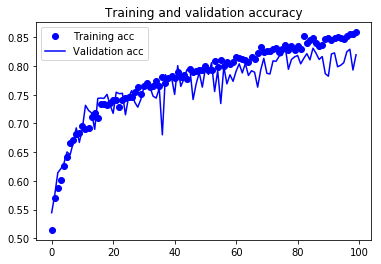

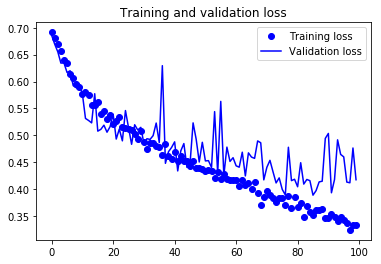

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
from tensorflow.keras import backend
backend.clear_session()

In [22]:
import gc
del model
gc.collect()

NameError: name 'model' is not defined